# Experiment 2

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras as tfk
from matplotlib import pyplot as plt

## CNN Training

In [2]:
def dataset_prep_mnist():
    mnist = tf.keras.datasets.mnist

    (data_train, label_train), (data_test, label_test) = mnist.load_data()
    # # # Normalize 0 to 255 value matrix to 0 to 1 value matrix
    # data_train, data_test = data_train/255.0, data_test/255.0
    train_data = data_train.reshape(data_train.shape[0], 28, 28, 1)
    train_label = np.asarray(label_train, dtype=np.int32)
    test_data = data_test.reshape(data_test.shape[0], 28, 28, 1)
    test_label = np.asarray(label_test, dtype=np.int32)

    return train_data, train_label, test_data, test_label

In [3]:
def lenet5():
    model = tfk.models.Sequential([
        tfk.layers.Conv2D(filters=6, kernel_size=(5, 5), activation=tf.nn.relu, input_shape=(28, 28, 1)),
        tfk.layers.MaxPool2D(pool_size=(2, 2), strides=2),
        tfk.layers.Conv2D(filters=16, kernel_size=(5, 5), activation=tf.nn.relu),
        tfk.layers.MaxPool2D(pool_size=(2, 2), strides=2),
        tfk.layers.Flatten(),
        tfk.layers.Dense(120, activation=tf.nn.relu),
        tfk.layers.Dense(84, activation=tf.nn.relu),
        tfk.layers.Dense(10, activation=tf.nn.softmax),
    ])

#     model.compile(optimizer=tfk.optimizers.SGD(lr=0.001, decay=0.000001, momentum=0.5), loss=tfk.losses.sparse_categorical_crossentropy,
#                   metrics=[tfk.metrics.sparse_categorical_accuracy])
    
    model.compile(optimizer=tfk.optimizers.Adadelta(), loss=tfk.losses.sparse_categorical_crossentropy,
                  metrics=[tfk.metrics.sparse_categorical_accuracy])

    return model

In [4]:
# Create checkpoint callback
checkpoint_path = "/home/Tensorflow_Image_Classification/training_1/lenet5.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1,
                                                 save_best_only=True)

In [5]:
train_data, train_label, test_data, test_label = dataset_prep_mnist()
model = lenet5()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
dens

In [6]:
model.fit(train_data, train_label, epochs=8, batch_size=64, validation_data=(test_data, test_label), callbacks=[cp_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
59072/60000 [============================>.] - ETA: 0s - loss: 8.0109 - sparse_categorical_accuracy: 0.4626
Epoch 00001: val_loss improved from inf to 0.17916, saving model to /home/Tensorflow_Image_Classification/training_1/lenet5.ckpt

Consider using a TensorFlow optimizer from `tf.train`.
Instructions for updating:
Use tf.train.CheckpointManager to manage checkpoints rather than manually editing the Checkpoint proto.
60000/60000 [==============================] - 3s 50us/sample - loss: 7.8896 - sparse_categorical_accuracy: 0.4701 - val_loss: 0.1792 - val_sparse_categorical_accuracy: 0.9487
Epoch 2/8
59712/60000 [============================>.] - ETA: 0s - loss: 0.1168 - sparse_categorical_accuracy: 0.9661
Epoch 00002: val_loss improved from 0.17916 to 0.08251, saving model to /home/Tensorflow_Image_Classification/training_1/lenet5.ckpt

Consider using a TensorFlow optimizer from `tf.train`.
60000/60000 [====================

In [7]:
model.evaluate(test_data, test_label)

10000/10000 [==============================] - 0s 29us/sample - loss: 0.0593 - sparse_categorical_accuracy: 0.9870


[0.05933314996289373, 0.987]

## Layers study

In [8]:
# Extract Bottom 4 layers
conv_layer_outputs = [layer.output for layer in model.layers[:4]]
conv_activation_model = tfk.models.Model(inputs=model.input, outputs=conv_layer_outputs)

In [9]:
# Extract layers after layer #4
nn_layer_outputs = [layer.output for layer in model.layers[5:]]
nn_activation_model = tfk.models.Model(inputs=model.input, outputs=nn_layer_outputs)

### MNIST Testset #1

In [10]:
target_img_mnist1 = test_data[108]

In [11]:
target_img_mnist1.shape

(28, 28, 1)

In [12]:
test_data_tp_mnist1 = np.transpose(target_img_mnist1, (1,0,2))

In [13]:
test_img_mnist1 = np.hstack(test_data_tp_mnist1)

In [14]:
test_img_mnist1.shape

(28, 28)

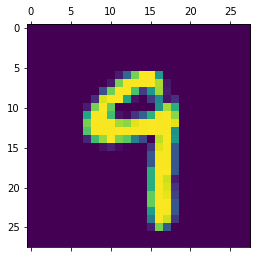

In [15]:
plt.matshow(test_img_mnist1)

In [16]:
img_tensor_mnist1 = np.expand_dims(target_img_mnist1, axis=0)

In [17]:
img_tensor_mnist1.shape

(1, 28, 28, 1)

### MNIST Testset #2

In [18]:
target_img_mnist2 = test_data[113]

In [19]:
target_img_mnist2.shape

(28, 28, 1)

In [20]:
test_data_tp_mnist2 = np.transpose(target_img_mnist2, (1,0,2))

In [21]:
test_img_mnist2 = np.hstack(test_data_tp_mnist2)

In [22]:
test_img_mnist2.shape

(28, 28)

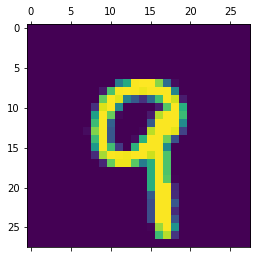

In [23]:
plt.matshow(test_img_mnist2)

In [24]:
img_tensor_mnist2 = np.expand_dims(target_img_mnist2, axis=0)

In [25]:
img_tensor_mnist2.shape

(1, 28, 28, 1)

### Convolution Activation response to given data

### MNIST #1

In [26]:
conv_activations = conv_activation_model.predict(img_tensor_mnist1)
first_conv_activation = conv_activations[0]

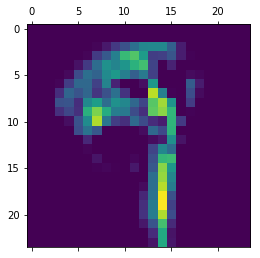

In [27]:
plt.matshow(first_conv_activation[0, :, :, 0], cmap='viridis')

In [28]:
layer_names = []
for layer in model.layers[:4]:
    layer_names.append(layer.name)

In [29]:
fmaps_pool = []
for layer_name, layer_activation in zip(layer_names, conv_activations):
    print("name: {0}\nactivation: {1}".format(layer_name, layer_activation.shape))
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    for fmaps in layer_activation:
        fmapsT = np.transpose(fmaps, (2, 0, 1))
        print("feature_maps_shape: {}".format(fmapsT.shape))
        fmap_layer = []
        for fmapT in fmapsT:
            fmap_layer.append(fmapT)
        fmaps_pool.append(fmap_layer)

name: conv2d
activation: (1, 24, 24, 6)
feature_maps_shape: (6, 24, 24)
name: max_pooling2d
activation: (1, 12, 12, 6)
feature_maps_shape: (6, 12, 12)
name: conv2d_1
activation: (1, 8, 8, 16)
feature_maps_shape: (16, 8, 8)
name: max_pooling2d_1
activation: (1, 4, 4, 16)
feature_maps_shape: (16, 4, 4)


(24, 144)
(12, 72)
(8, 128)
(4, 64)


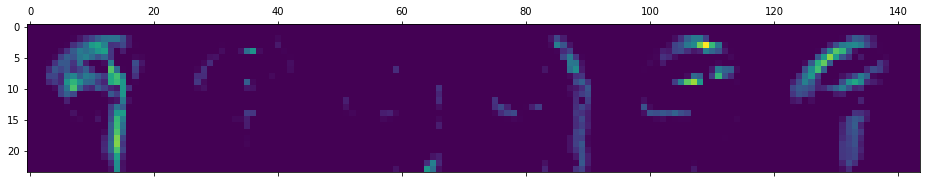

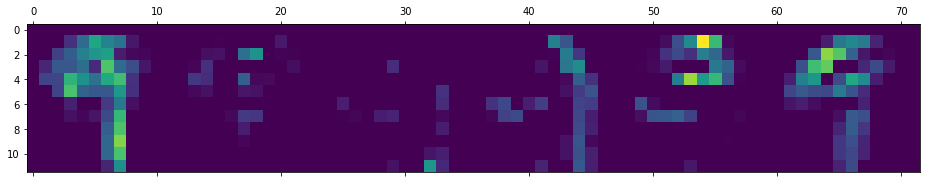

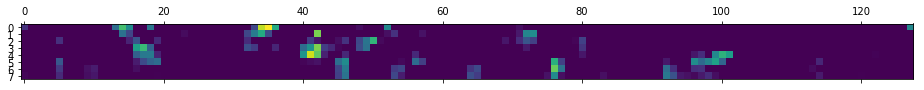

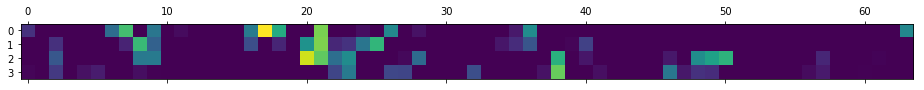

In [30]:
for x in fmaps_pool:
    map_stack = np.hstack(x)
    print(map_stack.shape)
    plt.matshow(map_stack, cmap='viridis')

### MNIST #2

In [31]:
conv_activations = conv_activation_model.predict(img_tensor_mnist2)
first_conv_activation = conv_activations[0]

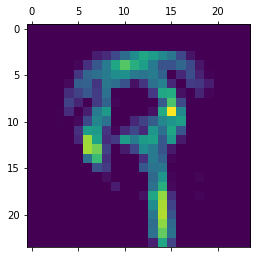

In [32]:
plt.matshow(first_conv_activation[0, :, :, 0], cmap='viridis')

In [33]:
layer_names = []
for layer in model.layers[:4]:
    layer_names.append(layer.name)

In [34]:
fmaps_pool = []
for layer_name, layer_activation in zip(layer_names, conv_activations):
    print("name: {0}\nactivation: {1}".format(layer_name, layer_activation.shape))
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    for fmaps in layer_activation:
        fmapsT = np.transpose(fmaps, (2, 0, 1))
        print("feature_maps_shape: {}".format(fmapsT.shape))
        fmap_layer = []
        for fmapT in fmapsT:
            fmap_layer.append(fmapT)
        fmaps_pool.append(fmap_layer)

name: conv2d
activation: (1, 24, 24, 6)
feature_maps_shape: (6, 24, 24)
name: max_pooling2d
activation: (1, 12, 12, 6)
feature_maps_shape: (6, 12, 12)
name: conv2d_1
activation: (1, 8, 8, 16)
feature_maps_shape: (16, 8, 8)
name: max_pooling2d_1
activation: (1, 4, 4, 16)
feature_maps_shape: (16, 4, 4)


(24, 144)
(12, 72)
(8, 128)
(4, 64)


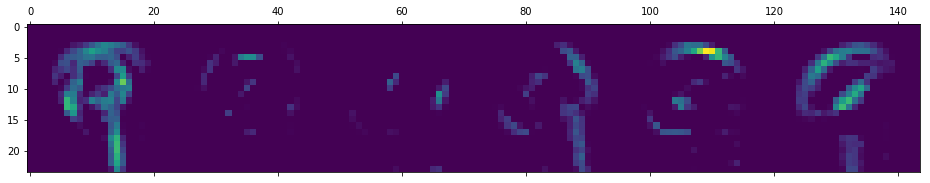

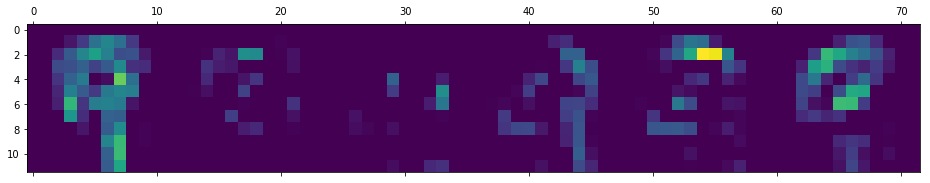

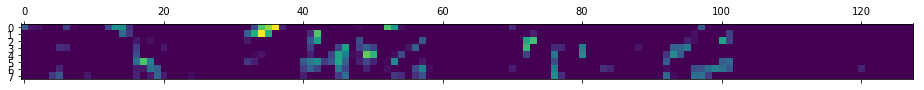

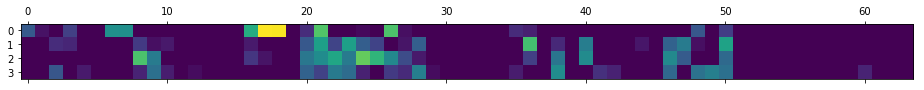

In [35]:
for x in fmaps_pool:
    map_stack = np.hstack(x)
    print(map_stack.shape)
    plt.matshow(map_stack, cmap='viridis')

### Neural Network Activation response to given data

### MNIST #1

In [36]:
nn_activations = nn_activation_model.predict(img_tensor_mnist1)

In [37]:
layer_names = []
for layer in model.layers[5:]:
    layer_names.append(layer.name)

In [38]:
fmaps_pool = []
for layer_name, layer_activation in zip(layer_names, nn_activations):
    print("name: {0}\nactivation: {1}".format(layer_name, layer_activation.shape))
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    for fmaps in layer_activation:
#         fmapsT = np.transpose(fmaps, (2, 0, 1))
#         print("feature_maps_shape: {}".format(fmapsT.shape))
        fmap_layer = []
        for fmap in fmaps:
            fmap_layer.append(fmap)
        fmaps_pool.append(fmap_layer)

name: dense
activation: (1, 120)
name: dense_1
activation: (1, 84)
name: dense_2
activation: (1, 10)


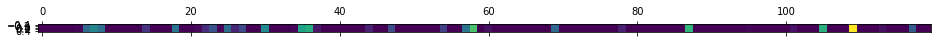

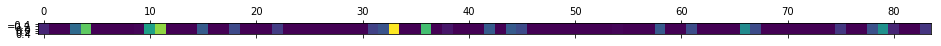

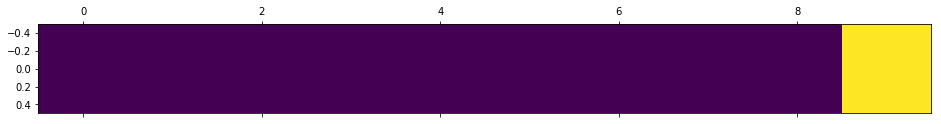

In [39]:
for x in fmaps_pool:
    map_stack = [np.hstack(x)]
#     print(map_stack.shape)
    plt.matshow(map_stack, cmap='viridis')

### MNIST #2

In [40]:
nn_activations = nn_activation_model.predict(img_tensor_mnist2)

In [41]:
layer_names = []
for layer in model.layers[5:]:
    layer_names.append(layer.name)

In [42]:
fmaps_pool = []
for layer_name, layer_activation in zip(layer_names, nn_activations):
    print("name: {0}\nactivation: {1}".format(layer_name, layer_activation.shape))
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    for fmaps in layer_activation:
#         fmapsT = np.transpose(fmaps, (2, 0, 1))
#         print("feature_maps_shape: {}".format(fmapsT.shape))
        fmap_layer = []
        for fmap in fmaps:
            fmap_layer.append(fmap)
        fmaps_pool.append(fmap_layer)
        

name: dense
activation: (1, 120)
name: dense_1
activation: (1, 84)
name: dense_2
activation: (1, 10)


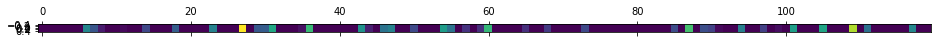

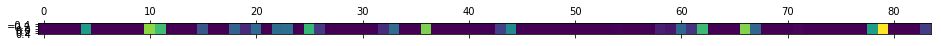

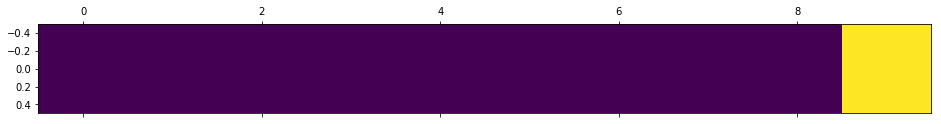

In [43]:
for x in fmaps_pool:
    map_stack = [np.hstack(x)]
#     print(map_stack.shape)
    plt.matshow(map_stack, cmap='viridis')

## Prediction

### MNIST #1

In [44]:
prediction = model.predict(img_tensor_mnist1)

In [45]:
prediction

array([[6.7009104e-10, 1.5794185e-10, 1.1885527e-09, 9.8410481e-11,
        8.2598883e-04, 7.2258501e-08, 1.9366755e-11, 2.3956549e-05,
        8.8402693e-08, 9.9914980e-01]], dtype=float32)

In [46]:
np.argmax(prediction)

9

### MNIST #2

In [47]:
prediction = model.predict(img_tensor_mnist2)

In [48]:
prediction

array([[1.3985687e-11, 1.0424612e-14, 2.0048257e-14, 5.9361988e-11,
        2.7963398e-10, 3.8699512e-13, 8.0670279e-20, 3.2668029e-10,
        7.0230918e-11, 1.0000000e+00]], dtype=float32)

In [49]:
np.argmax(prediction)

9